In [1]:
import numpy as np
from math import pi

In [2]:
def initialize_network(no_of_hidden_layers, hidden_layer_sizes):
    if no_of_hidden_layers != len(hidden_layer_sizes):
        return "Please enter valid information"
    
    X = 2*pi*np.random.random_sample((40,))
    X = np.sort(X)
    y = np.sin(X)
    
    layer_sizes = [1] + hidden_layer_sizes + [1]
    W = []
    for i in range(len(layer_sizes)-1):
        a,b = layer_sizes[i], layer_sizes[i+1]
        w = np.random.normal(0, 1, a*b).reshape(b,a)
        W.append(w)
    
    return X,y,W

In [3]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [4]:
def tanh(x):
    return np.tanh(x)

In [5]:
def logit(x):
    return np.log(x) - np.log(1-x)

In [6]:
def error(y_head,y):
    return 0.5*(y_head-y)**2

In [7]:
def forward_prop(x,W):
    outputs = []
    a = x.copy()
    layer_outputs = [a]
    for w in W:
        z = w.dot(a)
        a = tanh(z)
        a = a.reshape((a.shape[0],1))
        layer_outputs.append(a)
    
    return layer_outputs

In [8]:
def back_prop(X,y,W,learning_rate=0.03,no_of_epochs=10000):
    
    for _ in range(no_of_epochs):
        gradients = [np.zeros(w.shape) for w in W]
        for idx, x in enumerate(X):
            layer_outputs = forward_prop(x,W)
            i = -1
            deltas = [layer_outputs[i] - y[idx]]
            for w in reversed(W[1:]):
                i = i-1
                current = layer_outputs[i]
                layer_delta = w.T.dot(deltas[0])*(1-current**2)
                layer_delta = layer_delta.reshape((layer_delta.shape[0], 1))
                deltas.insert(0, layer_delta)

            for i in range(len(gradients)):
                gradients[i] = gradients[i] + deltas[i].dot(layer_outputs[i].T)

        for i in range(len(W)):
            W[i] = W[i] - learning_rate*(1/len(X))*gradients[i]
            
    return W

In [110]:
X,y,W = initialize_network(2, [10,12])

In [111]:
W_end = back_prop(X,y,W, learning_rate=0.1, no_of_epochs=100000)

In [112]:
y_score_train = []

for x in X:
    result = forward_prop(x,W_end)
    res = result[-1]
    y_score_train.append(res[0][0])
    
y_score_train = np.array(y_score_train)

In [113]:
total_error = np.sum(error(y_score_train,y))
total_error

0.23479289618660365

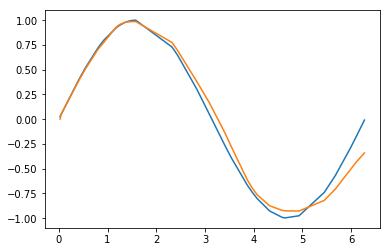

In [114]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure()
plt.plot(X,y)
plt.plot(X,y_score_train)
plt.show()

In [115]:
X_test = 2*pi*np.random.random_sample((40,))
#while len(set(X_test).intersection(set(X)))>=0:
#    X_test = 4*pi*np.random.random_sample((80,))
print(set(list(X_test)).intersection(set(list(X))))
X_test = np.sort(X_test)
y_test = np.sin(X_test)

set()


In [116]:
y_score_test = []

for x in X_test:
    result = forward_prop(x,W_end)
    res = result[-1]
    y_score_test.append(res[0][0])
    
y_score_test = np.array(y_score_test)
total_error = np.sum(error(y_score_test,y_test))
total_error

0.2016070478562409

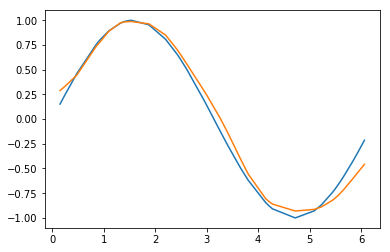

In [117]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure()
plt.plot(X_test,y_test)
plt.plot(X_test,y_score_test)
plt.show()